## Evaluation with dataset

In [ ]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
    context_relevancy,
    answer_correctness,
    answer_similarity
)

from ragas.metrics.critique import harmfulness
from ragas import evaluate
import pandas as pd
def create_ragas_dataset(rag_pipeline, eval_dataset):
  rag_dataset = []
  for row in tqdm(eval_dataset):
    answer = rag_pipeline.invoke({"input" : row["question"],"chat_history": []})
    rag_dataset.append(
        {"question" : row["question"],
         "answer" : answer["answer"],
         "contexts" : [context.page_content for context in answer["context"]],
         "ground_truth" : row["ground_truth"]
         }
    )
  rag_df = pd.DataFrame(rag_dataset)
  rag_eval_dataset = Dataset.from_pandas(rag_df)
  return rag_eval_dataset

def create_ragas_dataset_llama(rag_pipeline, eval_dataset):
  rag_dataset = []
  for row in tqdm(eval_dataset):
    answer = rag_pipeline.invoke(row["question"])
    rag_dataset.append(
        {"question" : row["question"],
         "answer" : answer["result"],
         "contexts" : [context.page_content for context in answer["source_documents"]],
         "ground_truth" : row["ground_truth"]
         }
    )
  rag_df = pd.DataFrame(rag_dataset)
  rag_eval_dataset = Dataset.from_pandas(rag_df)
  return rag_eval_dataset


# Đánh giá LLM

## Đánh giá so sánh cả 2 mô hình

In [ ]:
import pandas as pd
data1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/llama_eval_dataset.csv')
data2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/openai_eval_dataset.csv')

In [ ]:
print("Total row:",len(data1))
data2[['question', 'answer', 'contexts', 'ground_truth']]

Total row: 240


,question,answer,contexts,ground_truth
0,What are some of the skills taught in the Trai...,The Trail Patrol Training course teaches essen...,['Trail Patrol Training\nWant to be a part of ...,The course teaches the essential skills necess...
1,Who was the original owner of the lot of items...,The original lot of items belonged to Lt. Neil...,['\nInternational customers: if you want a pac...,The original lot of items belonged to Lt. Neil...
2,What is the main objective of Humanity Road as...,Humanity Road's main objective as a non-profit...,"[""Humanity Road (HR) is a unique not for profi...",The main objective of Humanity Road is to 'clo...
3,Who were the two convicted killers that escape...,Richard Matt and David Sweat were the two conv...,"[""One of two convicted killers who escaped fro...",The two convicted killers that escaped from an...
4,Who was the person that came to help when Isaa...,Jesus came to help when Isaac was sick.,"['“No,” I breathed. It couldn’t be my Isaac. M...",Jesus was the person who came to help when Isa...
...,...,...,...,...
235,Who was Stanley Meyer and what was his controv...,Stanley Meyer was an engineer who claimed to h...,"[""Inventor of the water-powered car screamed '...",Stanley Meyer was one of the most controversia...
236,What is the key instrument of choice in the ar...,The key instrument of choice in the area of Gu...,"[""The Coleman Archive Volume 1: The Living Tra...",The fiddle was the key instrument of choice in...
237,What was the purpose of the monthly newsletter...,The purpose of the monthly newsletter was to p...,['From November 1981 thru February 1983 the Mo...,The monthly newsletter produced by the Monadno...
238,What is the sale price of the 2117 of Sweden B...,The sale price of the 2117 of Sweden Bjorklide...,"["".\nDiscount Street Jackets More in the Main ...",The sale price of the 2117 of Sweden Bjorklide...


Vẽ đồ thị


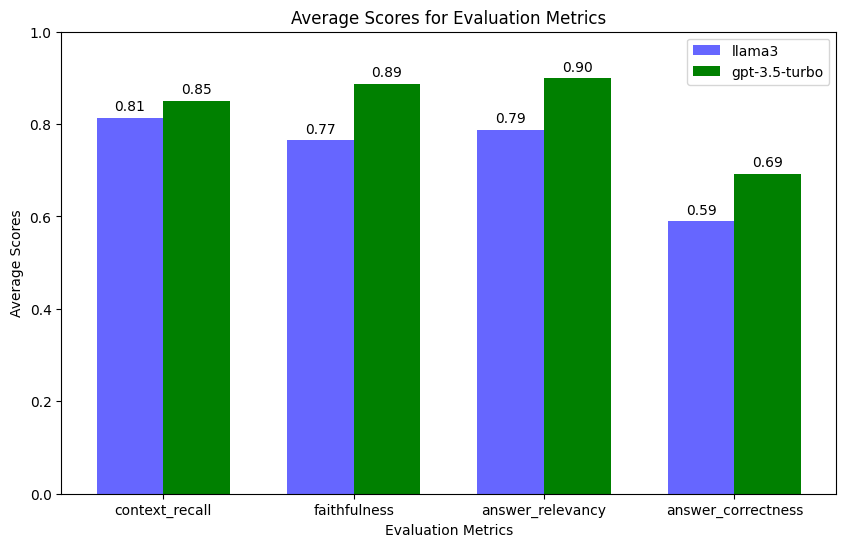

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
means1 = data1[['context_recall','faithfulness','answer_relevancy','answer_correctness']].mean()

means2 = data2[['context_recall','faithfulness','answer_relevancy','answer_correctness']].mean()

# Plotting the bar chart for both DataFrames
x = np.arange(len(means1))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, means1, width, label='llama3', color=['blue'], alpha=0.6)
bars2 = ax.bar(x + width/2, means2, width, label='gpt-3.5-turbo', color=['green'])

ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Average Scores')
ax.set_title('Average Scores for Evaluation Metrics')
ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(means1.index)
ax.legend()

# Display the value on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()